<a href="https://colab.research.google.com/github/komorimasashi/bunka-hakaru/blob/main/r_facial_expressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#必要なパッケージのインストール
targetPackages <- c('dplyr','MARSS','fda') 
newPackages <- targetPackages[!(targetPackages %in% installed.packages()[,"Package"])]
if(length(newPackages)) install.packages(newPackages)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘locfit’, ‘ash’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘plot3D’, ‘pracma’, ‘pcaPP’, ‘hdrcde’, ‘ks’, ‘bitops’, ‘rainbow’, ‘RCurl’, ‘fds’, ‘deSolve’




In [ ]:
# 2022年6月時点でNMFの依存パッケージのインストールが
# うまく行かない問題があります．下記のソースを実行してみてください
if(any(installed.packages()[,1]== 'NMF') == FALSE){
  BiocManager::install('Biobase')
  install.packages('BiocManager')
  install.packages('NMF')
}

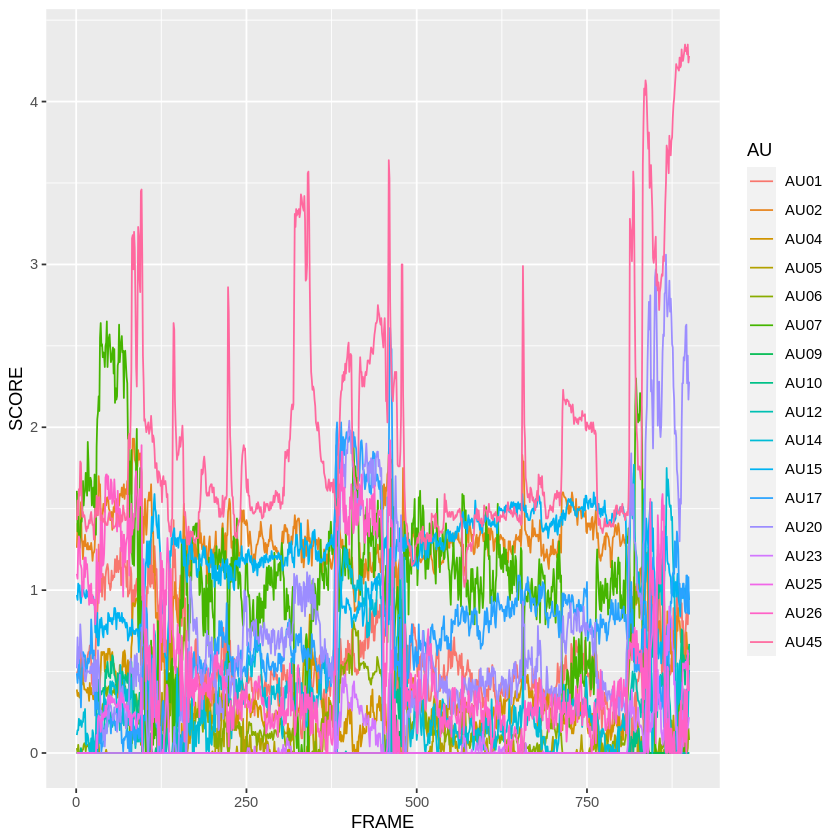

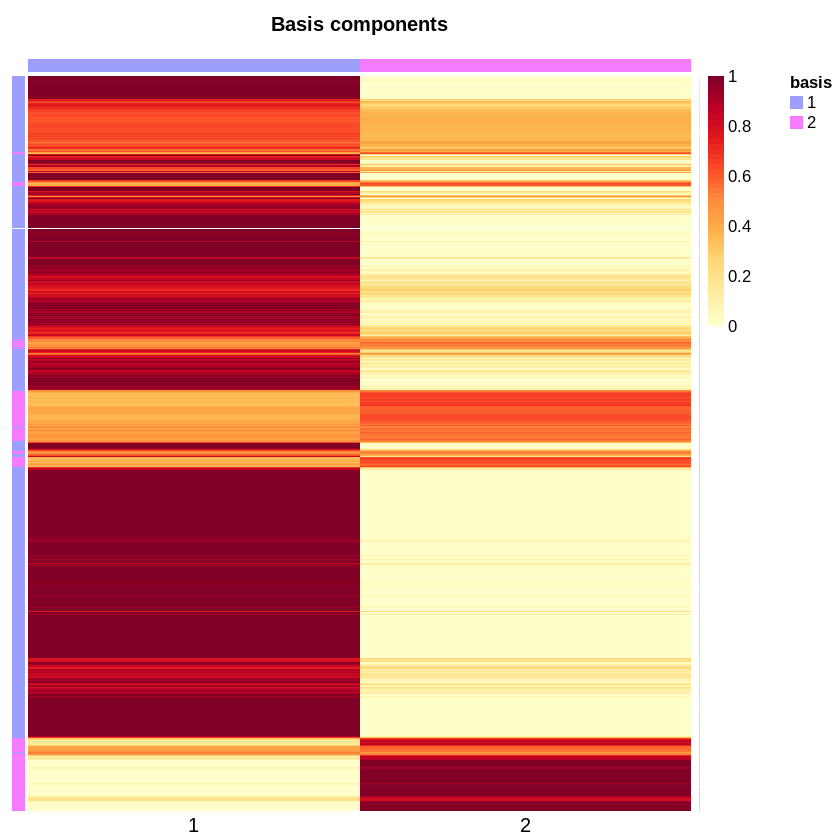

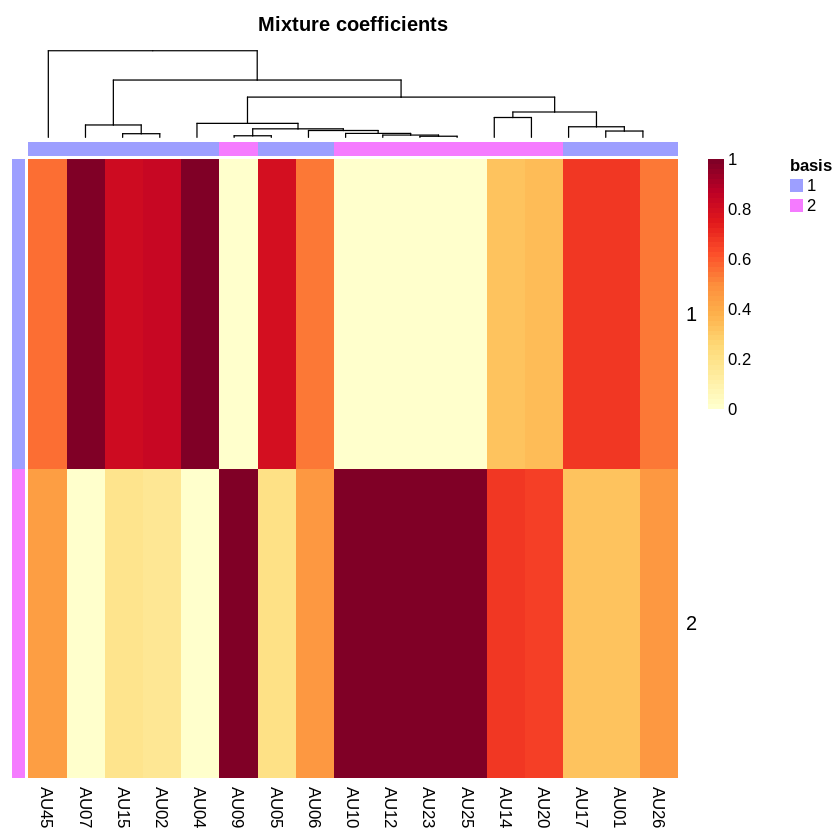

In [ ]:
# 非負値行列因子分解

library(dplyr)
library(ggplot2)
library(NMF)

# 読み込むGoogleスプレッドシートのURLを設定
URL <- "https://raw.githubusercontent.com/komorimasashi/time_series_book/90f315f0ad38f18167f6de4366e0667dda3106ed/data/abe_facial_mov.csv"
# データの読み込み
dat <- read.csv(URL, header=T,fileEncoding = "shift-jis")
# データの準備
df <- data.frame("FRAME" = dat$frame,
                 "AU01" = dat$AU01_r, "AU02" = dat$AU02_r, "AU04"= dat$AU04_r,
                 "AU05" = dat$AU05_r, "AU06" = dat$AU06_r, "AU07" =dat$AU07_r,
                 "AU09" = dat$AU09_r, "AU10" = dat$AU10_r, "AU12" = dat$AU12_r,
                 "AU14" = dat$AU14_r, "AU15" = dat$AU15_r, "AU17" = dat$AU17_r,
                 "AU20" = dat$AU20_r, "AU23" = dat$AU23_r, "AU25" = dat$AU25_r,
                 "AU26" =dat$AU26_r, "AU45" =dat$AU45_r)
# プロット
df2 <- df %>% tidyr::gather(key=AU, value = SCORE, colnames(df)[-1])
g <- ggplot(df2, aes(x = FRAME, y = SCORE, color = AU))+ geom_line()
plot(g)

# NMFの実行
library(NMF)
res <- nmf(df[-1], rank = 2, seed = 1234, .options = "t")
basismap(res, Rowv=NA) # 'Rowv=NA'とすることで時系列順に表示されます
coefmap(res)
